In [51]:
import sqlite3
import pandas as pd
from pandas.api.types import CategoricalDtype
from prophet import Prophet





In [52]:
TICKER = 'BA'
METRIC = 'closing_price'

In [53]:
# Connect to the database
conn = sqlite3.connect('news_wave_metrics.db')

# Read the table data into a pandas DataFrame
df = pd.read_sql_query(f'SELECT date, closing_price FROM stock_data WHERE ticker = "{TICKER}"', conn)



In [54]:
df.set_index('date', inplace=True)
df
#this is a test


,closing_price
date,
2014-03-24,106.078499
2014-03-25,106.594185
2014-03-26,106.173042
2014-03-27,105.897980
2014-03-28,106.972366
...,...
2024-05-07,176.710007
2024-05-08,180.350006
2024-05-09,181.250000


In [55]:
df = df.reset_index()\
    .rename(columns={'date': 'ds', 'closing_price': 'y'})

In [56]:
df

,ds,y
0,2014-03-24,106.078499
1,2014-03-25,106.594185
2,2014-03-26,106.173042
3,2014-03-27,105.897980
4,2014-03-28,106.972366
...,...,...
2548,2024-05-07,176.710007
2549,2024-05-08,180.350006
2550,2024-05-09,181.250000
2551,2024-05-10,178.509995


In [57]:
model = Prophet()

In [58]:
model.fit(df)

16:29:30 - cmdstanpy - INFO - Chain [1] start processing
16:29:31 - cmdstanpy - INFO - Chain [1] done processing


In [59]:
model.predict(df)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-03-24,112.149086,81.864030,132.984438,112.149086,112.149086,-4.165398,-4.165398,-4.165398,1.351084,1.351084,1.351084,-5.516482,-5.516482,-5.516482,0.0,0.0,0.0,107.983687
1,2014-03-25,112.169098,82.802527,133.584442,112.169098,112.169098,-3.786316,-3.786316,-3.786316,1.753277,1.753277,1.753277,-5.539593,-5.539593,-5.539593,0.0,0.0,0.0,108.382782
2,2014-03-26,112.189111,85.071277,136.345007,112.189111,112.189111,-3.799293,-3.799293,-3.799293,1.688679,1.688679,1.688679,-5.487972,-5.487972,-5.487972,0.0,0.0,0.0,108.389818
3,2014-03-27,112.209124,82.074447,132.814884,112.209124,112.209124,-3.605766,-3.605766,-3.605766,1.766576,1.766576,1.766576,-5.372342,-5.372342,-5.372342,0.0,0.0,0.0,108.603358
4,2014-03-28,112.229136,82.449084,131.786645,112.229136,112.229136,-3.743561,-3.743561,-3.743561,1.460494,1.460494,1.460494,-5.204055,-5.204055,-5.204055,0.0,0.0,0.0,108.485575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2548,2024-05-07,214.437497,176.998811,227.658930,214.437497,214.437497,-10.856097,-10.856097,-10.856097,1.753277,1.753277,1.753277,-12.609374,-12.609374,-12.609374,0.0,0.0,0.0,203.581400
2549,2024-05-08,214.503374,177.510943,228.854645,214.503374,214.503374,-11.051184,-11.051184,-11.051184,1.688679,1.688679,1.688679,-12.739863,-12.739863,-12.739863,0.0,0.0,0.0,203.452191
2550,2024-05-09,214.569251,179.441369,229.109182,214.569251,214.569251,-11.066550,-11.066550,-11.066550,1.766576,1.766576,1.766576,-12.833126,-12.833126,-12.833126,0.0,0.0,0.0,203.502701
2551,2024-05-10,214.635128,176.515769,230.635996,214.635128,214.635128,-11.427173,-11.427173,-11.427173,1.460494,1.460494,1.460494,-12.887666,-12.887666,-12.887666,0.0,0.0,0.0,203.207956


/Users/jjespinoza/Documents/repos/NewsWaveMetrics/.venv/lib/python3.12/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/jjespinoza/Documents/repos/NewsWaveMetrics/.venv/lib/python3.12/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


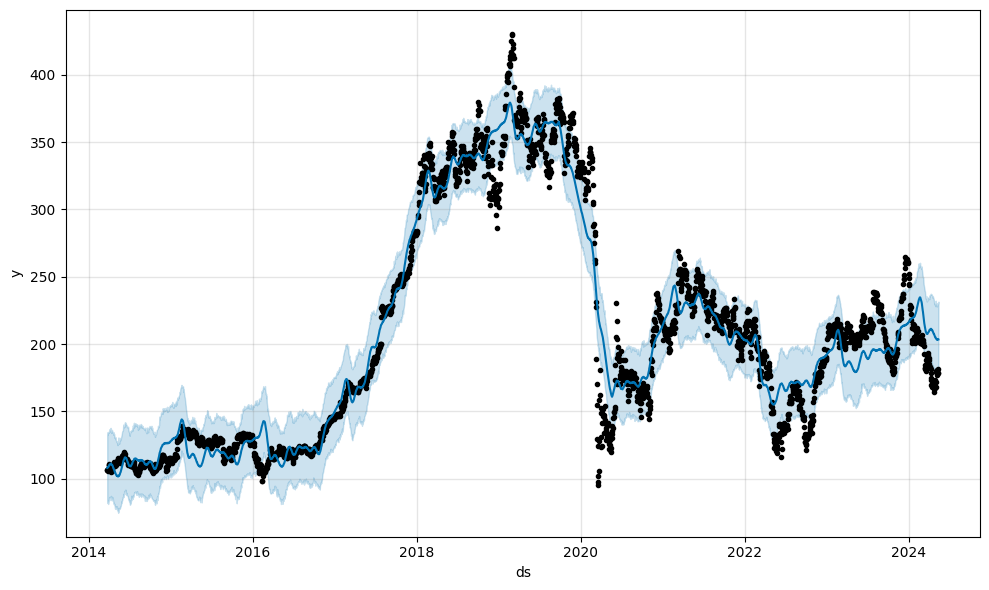

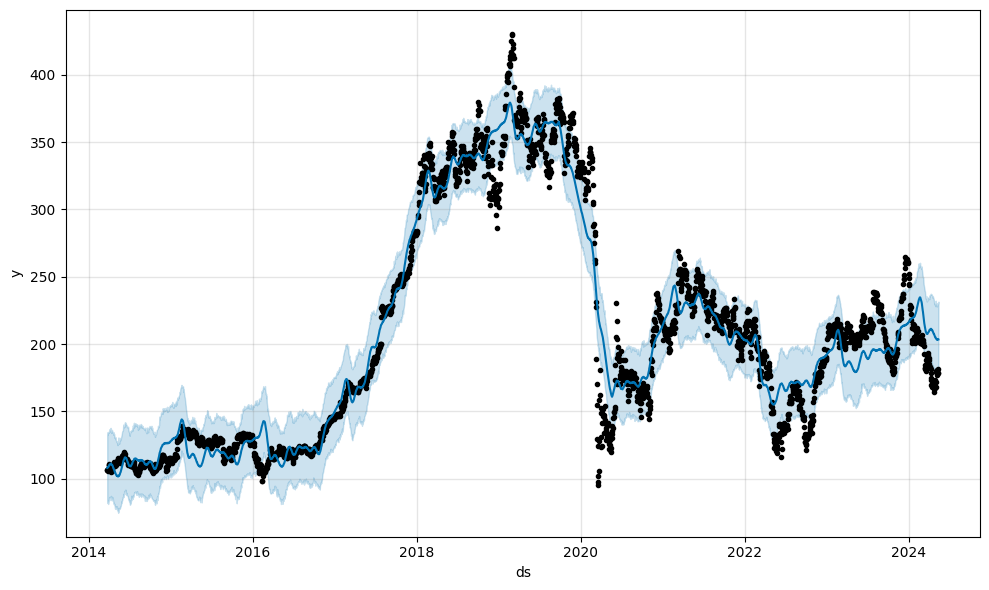

In [60]:
model.plot(model.predict(df))

/Users/jjespinoza/Documents/repos/NewsWaveMetrics/.venv/lib/python3.12/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/jjespinoza/Documents/repos/NewsWaveMetrics/.venv/lib/python3.12/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/Users/jjespinoza/Documents/repos/NewsWaveMetrics/.venv/lib/python3.12/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future ve

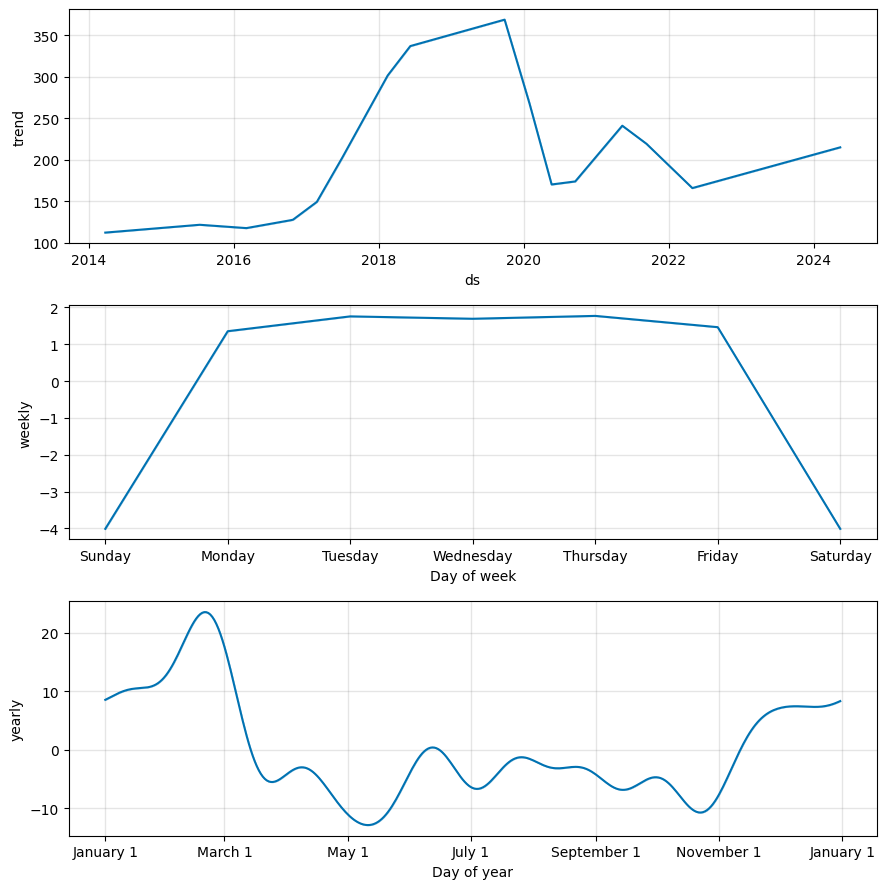

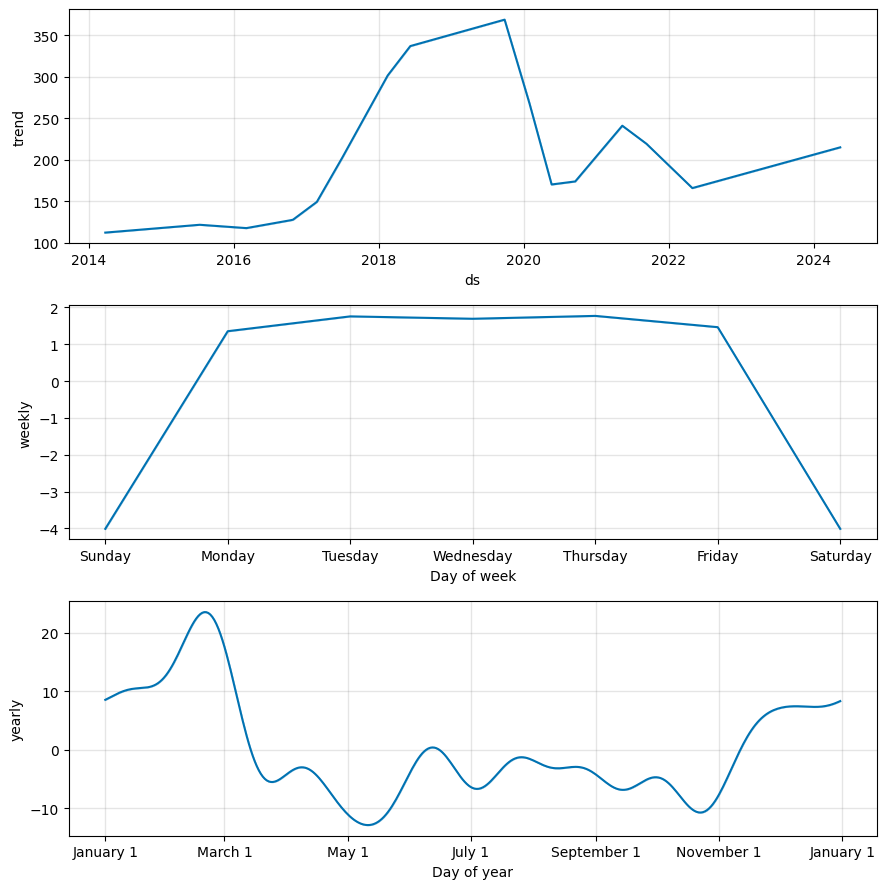

In [61]:
model.plot_components(model.predict(df))

In [63]:
# Create a future dataframe with n periods
future = model.make_future_dataframe(periods=14)

# Generate the forecast
forecast = model.predict(future)

# Print the forecasted values
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(14))

             ds        yhat  yhat_lower  yhat_upper
2553 2024-05-14  203.963878  177.537495  228.709570
2554 2024-05-15  204.126733  179.852576  228.604228
2555 2024-05-16  204.479140  180.424463  229.506261
2556 2024-05-17  204.495365  179.479667  229.563692
2557 2024-05-18  199.395270  175.927164  224.496949
2558 2024-05-19  199.813746  176.514627  226.623208
2559 2024-05-20  205.640708  178.281127  230.695839
2560 2024-05-21  206.554763  179.886018  230.848112
2561 2024-05-22  207.046072  180.443164  234.600369
2562 2024-05-23  207.721189  181.300145  233.238561
2563 2024-05-24  208.050137  181.011093  234.811039
2564 2024-05-25  203.248141  176.081473  228.404908
2565 2024-05-26  203.945152  178.309514  229.758796
2566 2024-05-27  210.025954  184.536348  235.536159
